<a href="https://colab.research.google.com/github/anama-1104/cis677/blob/main/Fall2025_skeleton_for_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
In this project, you will profile the execution of a program that finds the maximum independent set of a graph.

If you are not familiar with graphs, Wikipedia contains a nice introduction to the topic of graphs: https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)

Graphs are basically sets of nodes (usually represented as circles) and edges that connect those nodes.

The problem solved by the code below is the Maximum Independent Set. You are looking for the largest subset of nodes that have the property of not having any edge among them. Again, Wikipedia has a nice introduction to the topic:

https://en.wikipedia.org/wiki/Independent_set_(graph_theory)

This problem belongs to a category of problems called NP-hard problems.
The only algorihtms known to solve exactly NP-hard problems have exponential time complexity. This means, if the size of the problem is n, then the time required to solve the probleme exactly is O(k ^ n) where k > 1. In the code shown here, k is 2.

Your task is to profile the execution of the program.

As you did in the second lab activity: record the execution times and the number of times that line 47 (the if statement) is executed.

Create 2 plots, as you did for the lab activity, that have the size of the graph in the X axis. Create one plot to plot in the Y axis the number of times that line 47 is executed. Create a second plot to plot in the Y axis the execution times.

What is rate of growth for the function that relates the size of the problem with the execution time?

In [ ]:
%%writefile original_python.py
import sys
import time
import numpy as np

def read_adjacency_matrix(file_name):
  file_object = open(file_name, "r")
  # Input the number of rows and columns
  size = int(file_object.readline())
  rows = size
  cols = size
  # Initialize an empty matrix
  matrix = []

  # Input the matrix elements
  for i in range(rows):
    row = list(map(int, file_object.readline().split()))
    matrix.append(row)
  return matrix,size

# Convert an integer into a set of nodes
def convert_from_int_to_set(integer,size):
  set_of_nodes = []
  mask = 1
  for i in range(size):
    if ((mask & integer) != 0):
      set_of_nodes.append(i)
    mask = mask * 2
  return set_of_nodes

# Find the maximum independent set
def find_max_ind_set(adj_mat_numpy,size):
  max_independent_set_size = 0
  max_independent_set = []

  size_of_power_set = 1
  for i in range(size):
    size_of_power_set *= 2
  # print("The power set has ",size_of_power_set," elements")
  array_with_sizes = np.zeros(size_of_power_set)
  for i in range(size_of_power_set):
    this_set = convert_from_int_to_set(i,size)
    is_independent = True
    for n1 in this_set:
      for n2 in this_set:
        if (adj_mat_numpy[n1][n2] == 1):
          is_independent = False
    if (is_independent):
      array_with_sizes[i] = len(this_set)
    else:
      array_with_sizes[i] = 0


  max_independent_set_size = np.max(array_with_sizes)
  max_independent_set = np.where(array_with_sizes == max_independent_set_size)[0]
  print("The max independent sets are encoded by: ",max_independent_set)
  return max_independent_set_size



if __name__ == "__main__":
# Read the content of the file with the a passed in the command line
# that contain the matrices to be multiplied
  adj_matrix,size = read_adjacency_matrix(sys.argv[1])
  adj_matrix_numpy = np.array(adj_matrix)
  start_time = time.time()
  max_independent_set_size = find_max_ind_set(adj_matrix_numpy,size)
  end_time = time.time()
  elapsed_time = end_time - start_time
  print("Time required to carry out the computation in python: ",elapsed_time)
  print("The size of the maximum independent set is: ",max_independent_set_size)

Overwriting original_python.py


Three test files are provided below. They are complete graphs, graphs where every node is connected to every other node. A maximum independent set for these graphs contains only one node.

In [ ]:

%%writefile k16.txt
16
0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0

Writing k16.txt


In [ ]:
%%writefile k18.txt
18
0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0

Writing k18.txt


In [ ]:

%%writefile k20.txt
20
0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0

Writing k20.txt


Now the execution of the code:

In [ ]:
!python original_python.py k16.txt

The max independent sets are encoded by:  [    1     2     4     8    16    32    64   128   256   512  1024  2048
  4096  8192 16384 32768]
Time required to carry out the computation in python:  1.4744927883148193
The size of the maximum independent set is:  1.0


In [ ]:
!python original_python.py k18.txt

The max independent sets are encoded by:  [     1      2      4      8     16     32     64    128    256    512
   1024   2048   4096   8192  16384  32768  65536 131072]
Time required to carry out the computation in python:  7.494498252868652
The size of the maximum independent set is:  1.0


In [ ]:
!python original_python.py k20.txt

The max independent sets are encoded by:  [     1      2      4      8     16     32     64    128    256    512
   1024   2048   4096   8192  16384  32768  65536 131072 262144 524288]
Time required to carry out the computation in python:  39.012341022491455
The size of the maximum independent set is:  1.0


# Add your activites to profile below this cell
| Graph Size (n) | Line 47 Executions | Execution Time (s) |
Add blockquote
| 18             | 4,456,448          | 1.97               |
| 19             | 22,413,312         | 8.81               |
| 20             | 110,100,480        | 47.05              |


# Include your plots here

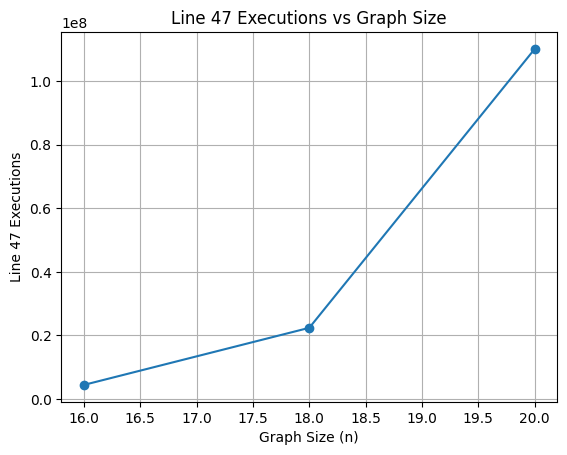

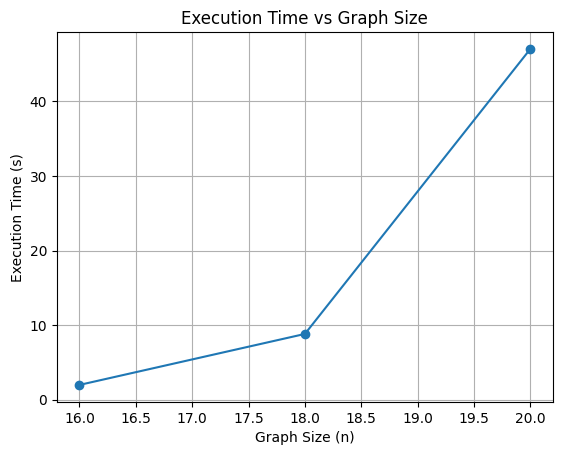

In [2]:
import matplotlib.pyplot as plt

sizes = [16, 18, 20]
exec_counts = [4456448, 22413312, 110100480]
times = [1.97, 8.81, 47.05]

# Plot 1: Line 47 executions
plt.plot(sizes, exec_counts, marker='o')
plt.xlabel("Graph Size (n)")
plt.ylabel("Line 47 Executions")
plt.title("Line 47 Executions vs Graph Size")
plt.grid(True)
plt.show()

# Plot 2: Execution times
plt.plot(sizes, times, marker='o')
plt.xlabel("Graph Size (n)")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs Graph Size")
plt.grid(True)
plt.show()


What is rate of growth for the function that relates the size of the problem with the execution time?

The rate of growth shows how execution time scales as the problem size increases.
If the time grows proportionally, it’s linear; if it grows much faster, it may be quadratic or exponential.
In short, it reflects the computational complexity of the program.